In [19]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import os
import math
import numpy as np
import torch as t
import torch.utils.data as tdata
import matplotlib.pyplot as plt
from einops import rearrange
from dots.training import *
from dots.trainhooks import *
from dots.models import MLP
from dots.dots import *
from dots.utils import *
from dots.plotting import *
from dots.datasets import *
from dots.experiment import get_train_state

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
model = MLP(2, 2, [100, 100])

In [62]:
ds = get_dataset("twoclasses")
X, y = x_y_tensors_of_dataset(ds)

In [63]:
model(t.tensor([[0, 0], [1, 1]]).float())

tensor([[ 0.1443,  0.0189],
        [ 0.1374, -0.0314]], grad_fn=<AddmmBackward0>)

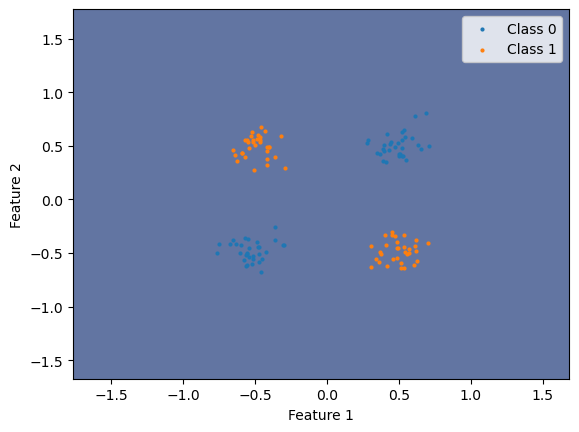

In [65]:
plot_decision_boundary(model, X, y, 0.05)

In [66]:
ts = get_train_state("../configs/models/mlp-twoclass.yml")

In [67]:
accuracy(ts.model, ds)

tensor(0.5000)

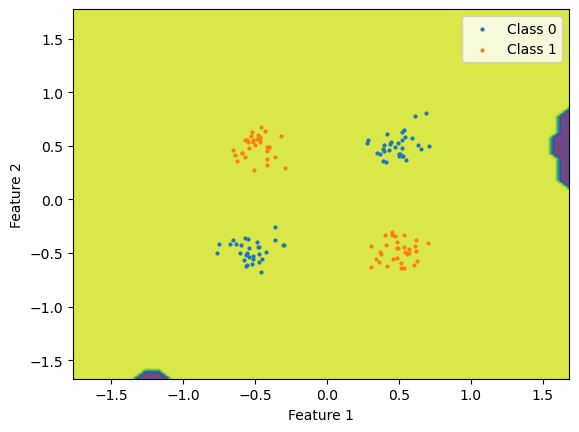

In [68]:
plot_decision_boundary(ts.model, X, y, 0.05)

In [69]:
ts.train(1)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:270: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


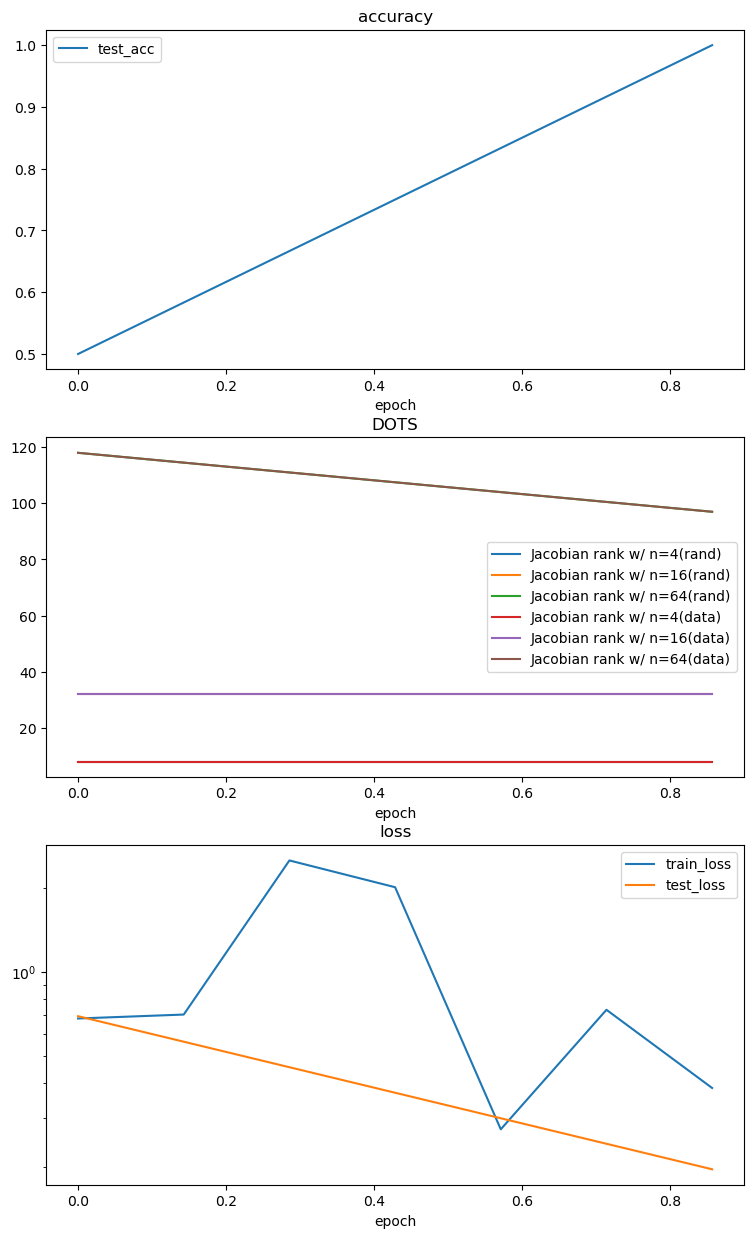

In [70]:
ts.plot()

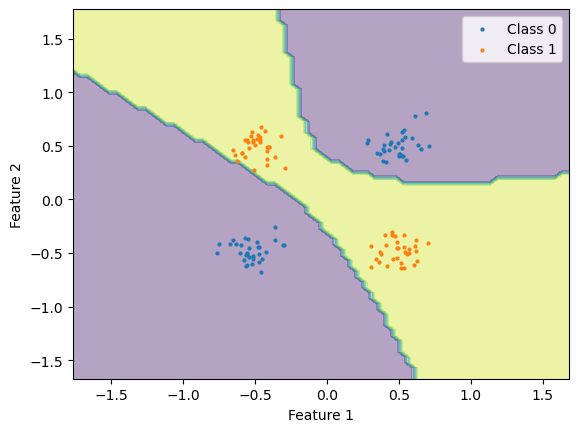

In [72]:
plot_decision_boundary(ts.model, X, y, 0.05)

# Random labels

In [122]:
ts = get_train_state("../configs/models/mlp-randtwoclass.yml")
ds = get_dataset("randtwoclasses")
X, y = x_y_tensors_of_dataset(ds)

In [123]:
ts.model.count_params()

17154

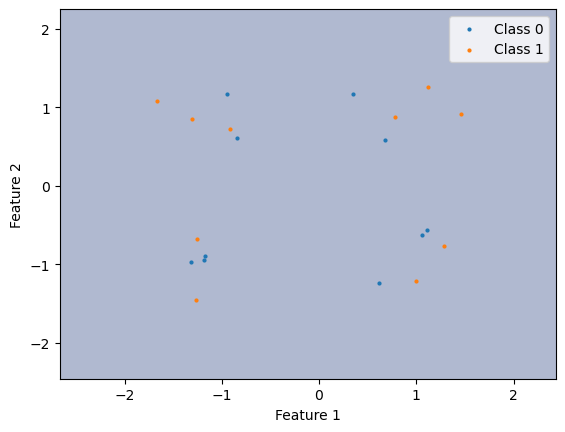

In [124]:
plot_decision_boundary(ts.model, X, y, 0.05)

In [125]:
ts.train(1000)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/training.py:270: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


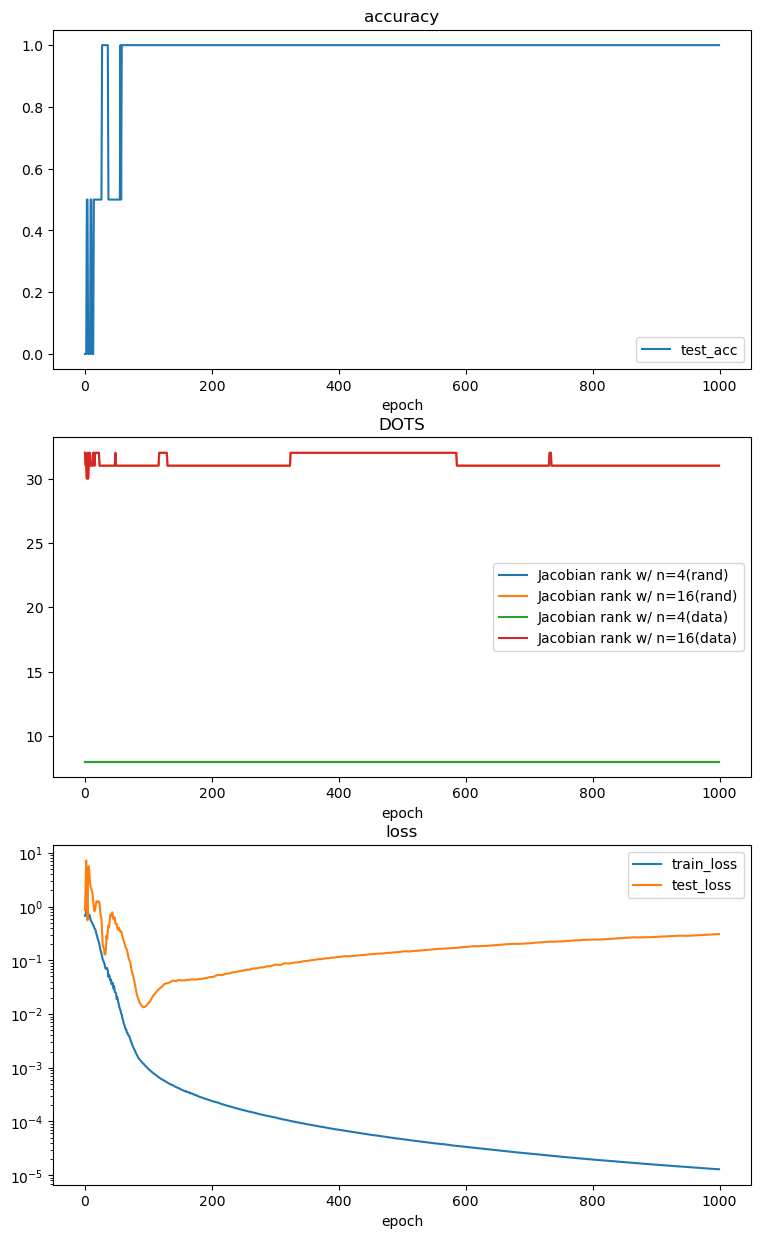

In [126]:
ts.plot()

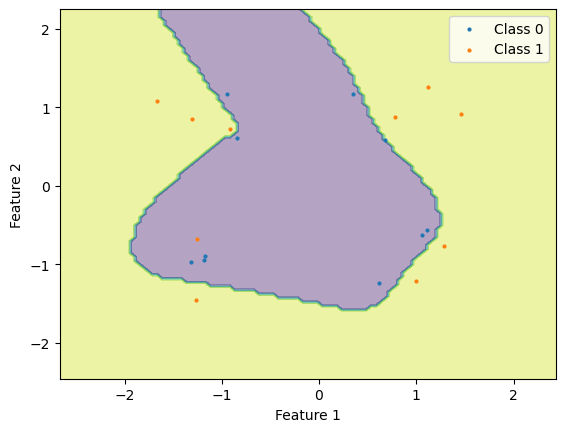

In [127]:
plot_decision_boundary(ts.model, X, y, 0.05)

# Random labels, from hp search

In [136]:
ts = get_train_state("../configs/models/mlp-randtwoclass.yml")
ds = get_dataset("randtwoclasses")
X, y = x_y_tensors_of_dataset(ds)

In [141]:
model = load_model("dainty-sweep-59")

FileNotFoundError: [Errno 2] No such file or directory: '../models/dainty-sweep-59.pt'

In [138]:
model

MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=2, bias=True)
  )
)

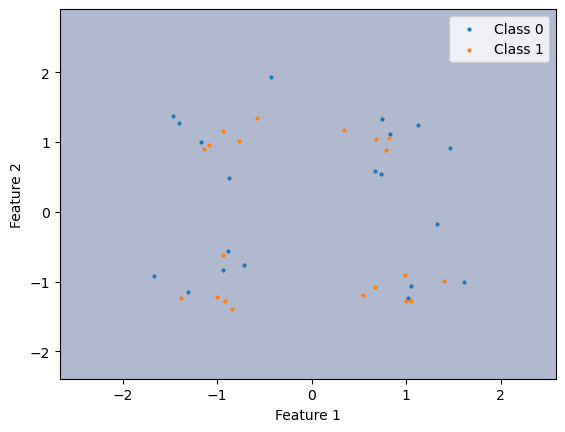

In [139]:
plot_decision_boundary(model, X, y, 0.05)

In [140]:
accuracy(model, ds)

tensor(0.5000)